In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from k_means import KMeansCustom

#### датасет состоит из игр
#### модель - k-means

In [2]:
data = pd.read_csv("data.csv")
data

,id,price,date,ram,hdd,reviews_30,reviews_all,Action,Adventure,RPG,Strategy,Simulation,Casual,Puzzle,Sports,Racing,Horror
0,1,9.99,9.730260e+08,96,0.0,0.95,0.96,1,0,0,0,0,0,0,0,0,0
1,2,19.99,1.602623e+09,4096,1200.0,0.85,0.93,1,0,0,1,1,0,0,0,0,0
2,3,19.99,1.613423e+09,8192,16384.0,0.80,0.89,1,0,0,0,0,0,0,0,0,0
3,4,19.99,1.567717e+09,4096,12288.0,0.00,0.55,0,0,0,0,1,0,0,1,0,0
4,5,4.99,1.574802e+09,4096,12288.0,0.00,0.66,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,9839,15.99,1.576098e+09,8192,150.0,0.89,0.89,0,0,0,0,1,0,0,0,0,0
9839,9840,19.99,1.717016e+09,8192,41984.0,0.88,0.91,1,1,0,0,1,1,0,0,0,0
9840,9841,19.99,1.602709e+09,4096,1024.0,0.87,0.93,0,0,0,1,0,0,0,0,0,0
9841,9842,29.99,1.582578e+09,2048,7168.0,1.00,0.79,1,0,1,0,0,0,0,0,0,0


убираю выбросы и невалидные значения

In [3]:
df = data[(data["price"] != -1) & (data["reviews_all"] != 0.0) & (data["hdd"] != 0.0) & (
        data["ram"] != 0.0) & (data["date"] != -1)].copy()

now = datetime.now().year
df["date"] = now - pd.to_datetime(df["date"], unit='s').dt.year
df["ram"] = df["ram"] / 1024
df["hdd"] = df["hdd"] / 1024

for col in ["price", "ram", "hdd", "date"]:
    limit = df[col].quantile(0.97)
    df = df[df[col] < limit]

df = df.drop(columns=["Horror", "Puzzle", "id", "reviews_30"])

df

,price,date,ram,hdd,reviews_all,Action,Adventure,RPG,Strategy,Simulation,Casual,Sports,Racing
1,19.99,5,4.0,1.171875,0.93,1,0,0,1,1,0,0,0
2,19.99,4,8.0,16.000000,0.89,1,0,0,0,0,0,0,0
3,19.99,6,4.0,12.000000,0.55,0,0,0,0,1,0,1,0
4,4.99,6,4.0,12.000000,0.66,0,0,0,0,1,0,1,0
5,4.99,6,4.0,12.000000,0.87,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,15.99,6,8.0,0.146484,0.89,0,0,0,0,1,0,0,0
9839,19.99,1,8.0,41.000000,0.91,1,1,0,0,1,1,0,0
9840,19.99,5,4.0,1.000000,0.93,0,0,0,1,0,0,0,0
9841,29.99,5,2.0,7.000000,0.79,1,0,1,0,0,0,0,0


немножко графиков

0.12266265171090811


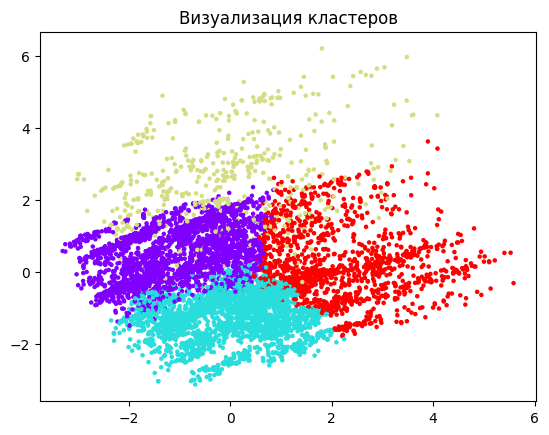

In [123]:
X = df.drop(columns=["reviews_all"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, max_iter=1110)
kmeans.fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(silhouette_score(X_scaled, kmeans.labels_))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow', s=5)
plt.title("Визуализация кластеров")
plt.show()

подбор гиперпараметров

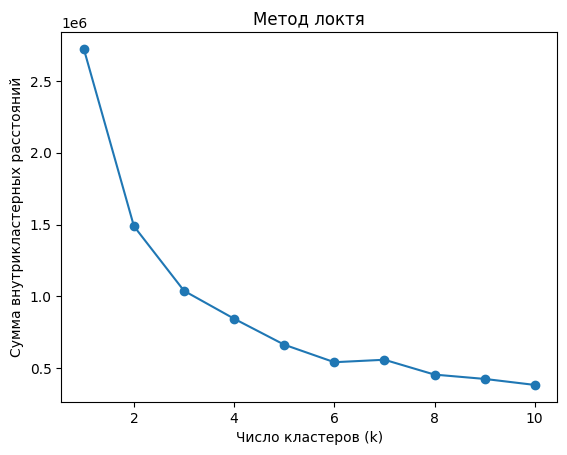

In [118]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Метод локтя")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний")
plt.show()

Выбираю 4 кластера т.к. после не силно меняется

In [121]:
X = df.drop(columns=["reviews_all"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
silhouette = []
for mi in range(10, 1111, 50):
    kmeans = KMeans(n_clusters=4, max_iter=mi, random_state=1)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette.append((score, mi))

max(silhouette)

(0.09840699216259591, 1110)

Baseline решение

In [5]:
df["cluster"] = np.select(
    [
        df["price"] < 5,
        (df["price"] >= 5) & (df["price"] < 10),
        (df["price"] >= 10) & (df["price"] < 30),
        df["price"] >= 30
    ],
    [0, 1, 2, 3]
)

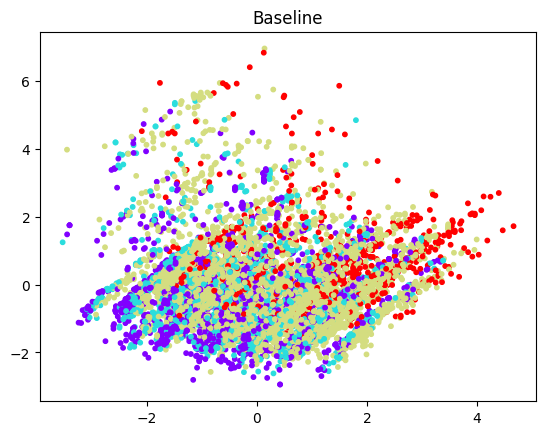

0.01815190211829995


In [6]:
X = df.drop(columns=["reviews_all", "cluster"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"], cmap='rainbow', s=10)
plt.title("Baseline")
plt.show()

score = silhouette_score(X_scaled, df["cluster"])
print(score)

Моя модель

0.13171228204931182


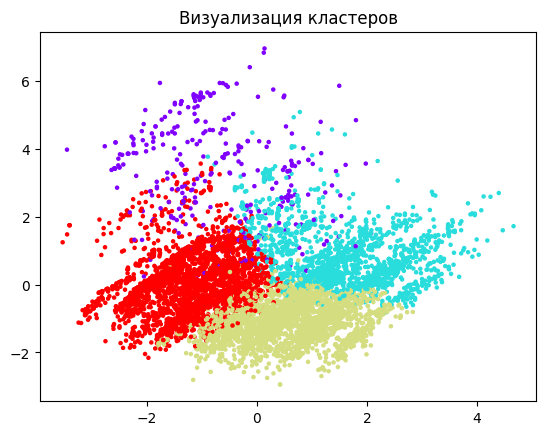

In [10]:
X = df.drop(columns=["reviews_all", "cluster"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeansCustom(cluster_cnt=4, max_iter=1110)
kmeans.fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(silhouette_score(X_scaled, kmeans.labels_))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow', s=5)
plt.title("Визуализация кластеров")
plt.show()

Подбор гиперпараметров

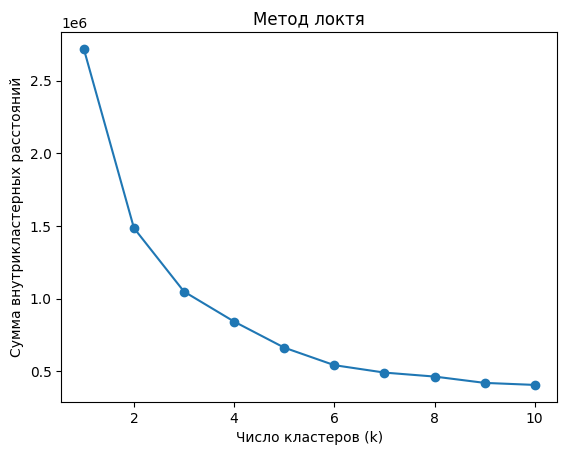

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeansCustom(cluster_cnt=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Метод локтя")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний")
plt.show()

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
silhouette = []
for mi in range(10, 1111, 100):
    kmeans = KMeansCustom(cluster_cnt=4, max_iter=mi)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette.append((score, mi))

max(silhouette)

(0.32060781861056414, 1110)

# сравнение метрик

- sklearn:    silhouette = 0.12266265171090811
- моя модель: silhouette = 0.13171228204931182
- baseline: silhouette = 0.01815190211829995